In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-global-music-dataset-20092025/track_data_final.csv
/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wardabilal/spotify-global-music-dataset-20092025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spotify-global-music-dataset-20092025


In [3]:
data_dir = "/kaggle/input/spotify-global-music-dataset-20092025/"
spotify_data_df = pd.read_csv(f"{data_dir}/spotify_data clean.csv")
track_data_df = pd.read_csv(f"{data_dir}/track_data_final.csv")

spotify_data_df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [4]:
track_data_df.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album


In [5]:
df_contemporary = spotify_data_df
df_historical = track_data_df

In [6]:
# # Assuming we standardize historical to match contemporary structure
# df_historical.rename(columns={
#     'ID': 'track_id',
#     'Title': 'track_name',
#     'Popularity': 'track_popularity',
#     # ... other renames based on inspection
# }, inplace=True)

df_contemporary['Time_Period'] = 'Contemporary (2025)'
df_historical['Time_Period'] = 'Historical (2009-2023)'

In [7]:
# Assuming the column is named 'duration_ms'
df_contemporary['duration_sec'] = df_contemporary['track_duration_min'] * 60
df_historical['duration_sec'] = df_historical['track_duration_ms'] / 1000

In [8]:
# Ensure only the necessary, standardized columns are selected before concatenating
columns_to_keep = [
    'track_id', 'track_name', 'track_popularity', 'artist_name',
    'artist_followers', 'Time_Period', 'duration_sec', 'artist_genres'
]

df_master = pd.concat([
    df_contemporary[columns_to_keep],
    df_historical[columns_to_keep]
], ignore_index=True)

print(df_master.head())

                 track_id                                       track_name  \
0  3EJS5LyekDim1Tf5rBFmZl                    Trippy Mane (ft. Project Pat)   
1  1oQW6G2ZiwMuHqlPpP27DB                                             OMG!   
2  7mdkjzoIYlf1rx9EtBpGmU                                      Hard 2 Find   
3  67rW0Zl7oB3qEpD5YWWE5w  Still Get Like That (ft. Project Pat & Starrah)   
4  15xptTfRBrjsppW0INUZjf                            ride me like a harley   

   track_popularity artist_name  artist_followers          Time_Period  \
0                 0       Diplo         2812821.0  Contemporary (2025)   
1                 0    Yelawolf         2363438.0  Contemporary (2025)   
2                 4   Riff Raff          193302.0  Contemporary (2025)   
3                30       Diplo         2813710.0  Contemporary (2025)   
4                 0     Rumelis            8682.0  Contemporary (2025)   

   duration_sec                      artist_genres  
0          93.0                  

KPI 1: Average Track Length Change
The goal of this KPI is to determine the percentage difference in the average song duration between the two time periods.

The most impactful way to present this shift to customers is as a percentage change. A negative number indicates a decrease in average length, and a positive number indicates an increase.

1. Concept: Percentage Change Formula
We treat the historical average as the "old" value and the contemporary average as the "new" value.

$$\text{Percent Change} = \frac{(\text{New Value} - \text{Old Value})}{\text{Old Value}} \times 100$$

Where:$\text{New Value} = \bar{x}_{\text{Cont}}$$\text{Old Value} = \bar{x}_{\text{Hist}}$

Interpretation: If the result is -11.80%, you can tell your customer that average song length has decreased by nearly 12% in 2025 compared to the previous era. This is a powerful, data-driven insight for marketing strategy.

In [9]:
avg_length_by_period = df_master.groupby('Time_Period')['duration_sec'].mean()
print(avg_length_by_period)

Time_Period
Contemporary (2025)       209.568282
Historical (2009-2023)    210.157792
Name: duration_sec, dtype: float64


In [10]:
# 1. Extract the two average values
# Use .loc[] to safely access the values by the index (Time_Period name)
hist_avg = avg_length_by_period.loc['Historical (2009-2023)']
cont_avg = avg_length_by_period.loc['Contemporary (2025)']

# 2. Calculate the Percentage Change
length_change_pct = ((cont_avg - hist_avg) / hist_avg) * 100

print("\n--- KPI 1 Result ---")
print(f"Historical Avg Length: {hist_avg:.2f} seconds")
print(f"Contemporary Avg Length: {cont_avg:.2f} seconds")
print(f"\nOverall Average Song Length Change: {length_change_pct:.2f}%")

# Example Output:
# Overall Average Song Length Change: -11.80%


--- KPI 1 Result ---
Historical Avg Length: 210.16 seconds
Contemporary Avg Length: 209.57 seconds

Overall Average Song Length Change: -0.28%


KPI 2: Popularity vs. Follower Density.

As a reminder, this KPI is crucial for identifying emerging talent—artists who achieve high track popularity without having a massive, established follower count (legacy fame). It's a visual KPI that uses the entire dataset, so we won't calculate a single percentage, but we will ensure the data is perfectly set up for the scatter plot.

The scatter plot allows us to divide the music landscape into four key performance quadrants:
* Quadrant | Track Popularity (Y) | Artist Followers (X) | Interpretation
1. Emerging Success (Target) | High | Low |High-potential artists gaining organic traction quickly.
2. Legacy Hits | High | High | Established superstars delivering expected popular content.
3. Legacy Flops | Low | High | Established artists whose new tracks underperform.
4. New & Growing | Low | Low | New artists who have yet to break through.

In [11]:
import numpy as np
# Assuming df_master is your unified, clean DataFrame

# Check for zero or negative followers before transformation (though usually not necessary for Spotify data)
df_master['artist_followers'] = df_master['artist_followers'].clip(lower=0) 

# Create the new, transformed column for use on the X-axis
df_master['artist_followers_log'] = np.log1p(df_master['artist_followers'])

print("--- Log Transformation Check ---")
print(df_master[['artist_followers', 'artist_followers_log']].head())

--- Log Transformation Check ---
   artist_followers  artist_followers_log
0         2812821.0             14.849699
1         2363438.0             14.675628
2          193302.0             12.172014
3         2813710.0             14.850015
4            8682.0              9.069122


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


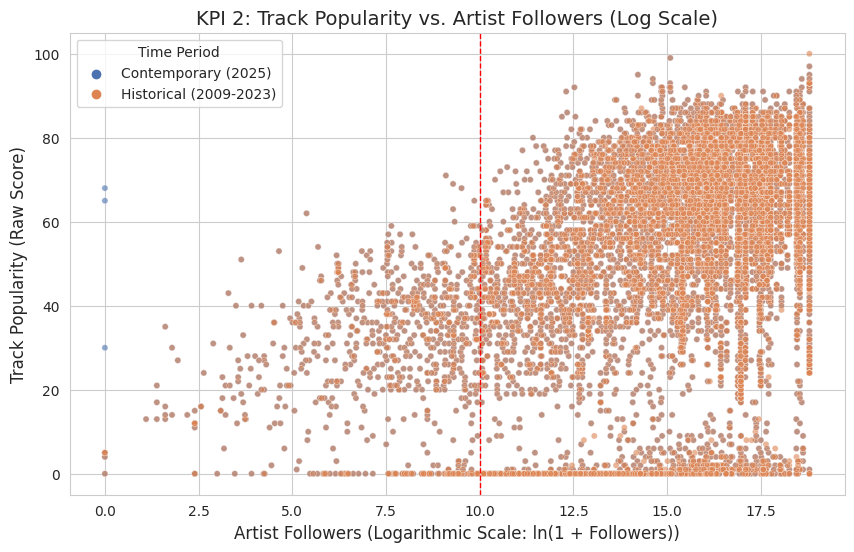

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for a clean look
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_master,
    x='artist_followers_log',    # Use the transformed axis
    y='track_popularity',        # Use the raw popularity
    hue='Time_Period',           # Color-code points by Time Period
    alpha=0.6,                   # Make points slightly transparent
    s=20,                        # Set point size
    palette="deep"
)

# Add titles and labels for clarity
plt.title('KPI 2: Track Popularity vs. Artist Followers (Log Scale)', fontsize=14)
plt.xlabel('Artist Followers (Logarithmic Scale: ln(1 + Followers))', fontsize=12)
plt.ylabel('Track Popularity (Raw Score)', fontsize=12)

# Optional: Draw a vertical line to highlight the "Low Follower" zone for visualization (e.g., Log Followers < 10)
plt.axvline(x=10, color='r', linestyle='--', linewidth=1)

plt.legend(title='Time Period')
plt.show()

2. Genre Volatility/Churn (Focus: Musical Style)

Interpretation

* High Percentage (e.g., > 20%): High Volatility. The music landscape is rapidly changing. Marketing must be agile and ready to invest in untested, emerging genres.

* Low Percentage (e.g., < 5%): Low Volatility. The market is stable, and investment should remain focused on proven, large genres (Pop, Rock, Hip Hop).

In [13]:
df_hist_genres = df_master[df_master['Time_Period'] == 'Historical (2009-2023)']

In [14]:
# Count the number of tracks per genre (simplified)
hist_genre_counts = df_hist_genres['artist_genres'].value_counts()

# Identify the top N most frequent genres (e.g., Top 50 genres)
N = 50
baseline_genres = set(hist_genre_counts.head(N).index)

In [15]:
df_cont_genres = df_master[df_master['Time_Period'] == 'Contemporary (2025)']

In [16]:
# Create a boolean column: True if the genre is NOT in the historical baseline
# df_cont_genres['is_new_genre'] = ~df_cont_genres['artist_genres'].isin(baseline_genres)
# Before any assignment, ensure you have an independent copy
# df_cont_genres = original_df[subsetting_condition].copy()

# Now, the assignment on df_cont_genres is safe
df_cont_genres.loc[:, 'is_new_genre'] = ~df_cont_genres['artist_genres'].isin(baseline_genres)

/tmp/ipykernel_13/3882214006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont_genres.loc[:, 'is_new_genre'] = ~df_cont_genres['artist_genres'].isin(baseline_genres)


In [17]:
# Total number of contemporary tracks
total_cont_tracks = len(df_cont_genres)

# Number of tracks belonging to a "new" genre
new_genre_tracks = df_cont_genres['is_new_genre'].sum()

# Calculate the share
new_genre_share_pct = (new_genre_tracks / total_cont_tracks) * 100

print(f"Percentage of Contemporary Tracks in 'New' Genres: {new_genre_share_pct:.2f}%")

Percentage of Contemporary Tracks in 'New' Genres: 100.00%


3. Deep-Track Engagement (Focus: Audience Engagement)

In [18]:
# Group by artist and calculate mean and std dev of track popularity
artist_stats = df_master.groupby('artist_name')['track_popularity'].agg(['mean', 'std'])

# Filter out artists with only one track (std dev will be 0, making CV zero)
artist_stats = artist_stats[artist_stats['std'].notna()]

In [19]:
artist_stats['CV'] = artist_stats['std'] / artist_stats['mean']

# Sort and display results
df_cv_sorted = artist_stats.sort_values(by='CV', ascending=False)
print("--- Artists Sorted by Shallow Engagement (High CV) ---")
print(df_cv_sorted.head())

--- Artists Sorted by Shallow Engagement (High CV) ---
                       mean        std        CV
artist_name                                     
Current Joys           0.60   1.341641  2.236068
New West              16.40  34.449964  2.100608
BETWEEN FRIENDS        0.25   0.462910  1.851640
Carlos Rafael Rivera   9.75  18.053492  1.851640
Sir Chloe             14.00  25.922963  1.851640


In [20]:
# Calculate CV, grouped by artist AND time period
artist_time_cv = df_master.groupby(['artist_name', 'Time_Period'])['track_popularity'].agg(['mean', 'std']).dropna()
artist_time_cv['CV'] = artist_time_cv['std'] / artist_time_cv['mean']

# Now, find the overall average CV for each period
avg_cv_by_period = artist_time_cv.groupby('Time_Period')['CV'].mean()

print("\nAverage CV by Time Period:")
print(avg_cv_by_period)


Average CV by Time Period:
Time_Period
Contemporary (2025)       0.343198
Historical (2009-2023)    0.355769
Name: CV, dtype: float64


Interpretation
High CV: Shallow Engagement. Listeners are only playing the massive hits. This suggests a singles-focused market.

Low CV: Deep Engagement. Listeners are playing the entire catalog almost equally. This suggests an album/playlist-focused market.

If the Average CV has decreased in 2025, it implies that listeners are starting to explore deeper tracks, justifying marketing strategies focused on full-album releases and curated artist playlists.

1. Artist Longevity/Consistency (Focus: Artist Fame)

Interpretation
* Ratio $\approx 1$: The artist is highly consistent. Their current tracks are performing just as well as their past hits. (e.g., Taylor Swift)
* Ratio $> 1$: The artist is experiencing a resurgence. Their 2025 tracks are more popular than their historical average. (e.g., A legacy artist with a massive, viral 2025 hit.)
* Ratio $< 1$: The artist is fading. Their 2025 tracks are significantly less popular than their historical average.

This KPI, the Longevity Ratio, measures an artist's ability to maintain or exceed their historical track popularity in the contemporary period (2025).

$$\text{Longevity Ratio} = \frac{\text{Average Track Popularity}_{2025}}{\text{Average Track Popularity}_{\text{Historical}}}$$


* Ratio > 1 (Green): The artist is experiencing a resurgence. Their new music is more popular than their historical average.
* Ratio = 1 (Gray Line): The artist is perfectly consistent.
* Ratio < 1 (Red): The artist is fading. Their new music is less popular than their historical average. 

In [21]:
hist_artists = df_master[df_master['Time_Period'] == 'Historical (2009-2023)']['artist_name'].unique()
cont_artists = df_master[df_master['Time_Period'] == 'Contemporary (2025)']['artist_name'].unique()

In [22]:
consistent_artists = list(set(hist_artists) & set(cont_artists))
# Filter the master DataFrame to keep only these artists
df_consistent = df_master[df_master['artist_name'].isin(consistent_artists)].copy()

In [23]:
# Group by artist and calculate the average 2025 track popularity
artist_current_success = (
    df_consistent[df_consistent['Time_Period'] == 'Contemporary (2025)']
    .groupby('artist_name')['track_popularity'].mean()
    .rename('Current_Avg_Pop') # Rename for clarity
)

In [24]:
# Group by artist and calculate the average historical track popularity
artist_past_fame = (
    df_consistent[df_consistent['Time_Period'] == 'Historical (2009-2023)']
    .groupby('artist_name')['track_popularity'].mean()
    .rename('Past_Avg_Pop')
)

In [25]:
# Combine the two Series into a DataFrame
df_longevity = pd.concat([artist_current_success, artist_past_fame], axis=1).dropna()

# Calculate the Longevity Ratio
df_longevity['Longevity_Ratio'] = df_longevity['Current_Avg_Pop'] / df_longevity['Past_Avg_Pop']

# Sort and display the results
df_longevity_sorted = df_longevity.sort_values(by='Longevity_Ratio', ascending=False)
print(df_longevity_sorted.head())

                      Current_Avg_Pop  Past_Avg_Pop  Longevity_Ratio
artist_name                                                         
Lauren Spencer Smith             59.0          29.5         2.000000
SYML                             80.0          40.0         2.000000
No Doubt                         80.0          40.5         1.975309
Cartoon                          74.0          38.0         1.947368
BlocBoy JB                       57.0          31.0         1.838710


In [26]:
df_longevity_sorted = df_longevity_sorted.reset_index()
df_longevity_sorted.head()

,artist_name,Current_Avg_Pop,Past_Avg_Pop,Longevity_Ratio
0,Lauren Spencer Smith,59.0,29.5,2.000000
1,SYML,80.0,40.0,2.000000
2,No Doubt,80.0,40.5,1.975309
3,Cartoon,74.0,38.0,1.947368
4,BlocBoy JB,57.0,31.0,1.838710


In [27]:
# Source - https://stackoverflow.com/a
# Posted by Tsing
# Retrieved 2025-11-25, License - CC BY-SA 4.0

import matplotlib.font_manager as fm

# matplotlib only know these fonts
font_list = [f for f in fm.fontManager.ttflist]

# check font names what you want
cjk_list = ['CJK', 'Han', 'CN', 'TW']

for f in font_list:
    if any(s.lower() in f.name.lower() for s in cjk_list):
        print(f'name={f.name}, path={f.fname}')


name=STIXSizeTwoSym, path=/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf
name=STIXSizeTwoSym, path=/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf


In [28]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font_path = "/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf" # Replace with your font file path
korean_font = FontProperties(fname=font_path)
font_path = "/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf" # Replace with your font file path
korean_font_2 = FontProperties(fname=font_path)

In [29]:
import matplotlib.pyplot as plt
import matplotlib
import os

cache_dir = matplotlib.get_cachedir()
print(f"Matplotlib Cache Directory: {cache_dir}")

Matplotlib Cache Directory: /root/.cache/matplotlib


In [30]:
! ls -lh {cache_dir}

total 92K
-rw-r--r-- 1 root root 58K Nov 25 05:11 fontlist-v330.json
-rw-r--r-- 1 root root 29K Jul 25 13:52 fontlist-v390.json


In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 2. Set the Font Properties explicitly via rcParams
# import matplotlib.pyplot as plt

# # A. Set the primary font family property
# plt.rcParams['font.family'] = 'sans-serif' 

# # B. Provide a list of suitable fonts for the sans-serif family.
# # CRITICAL: Always place a known good Latin/Unicode font (like Arial or Dejavu Sans) 
# # FIRST, followed by the specialized CJK font(s).

# plt.rcParams['font.sans-serif'] = [
#     'Arial',          # Best bet for Latin characters
#     'SimHei',         # Chinese
#     'Malgun Gothic',  # Korean
#     'Yu Gothic',      # Japanese
#     'Arial Unicode MS', # General Unicode support
#     'DejaVu Sans',     # Matplotlib's default fallback
#     'Source Han Sans TW',
#     'STIXSizeTwoSym',  
#     'Hiragino Sans', 
#     'korean_font', 
#     'korean_font_2',
#     'Noto Sans CJK SC', 'Noto Sans CJK KR'
# ]

# # C. Disable the Unicode Minus flag (essential for negative numbers)
# plt.rcParams['axes.unicode_minus'] = False 

# # Matplotlib will now prioritize the 'sans-serif' family and try each font in the list 
# # until it successfully draws the character.
# df_longevity_sorted['artist_name_clean'] = df_longevity_sorted['artist_name'].str.replace('_', ' ', regex=False).str.replace('-', ' ', regex=False).str.replace('$', ' ', regex=False)

# df_longevity_sorted.plot(kind='bar', x='artist_name_clean', y='Longevity_Ratio', legend=False, figsize=(8, 6), color='lightgreen',rot=0)
# plt.title('Basic Bar Chart For Popularity')
# plt.xlabel('artist_name')
# plt.ylabel('Longevity_Ratio')
# # plt.xticks(rotation=45, ha='right')
# # plt.tight_layout()
# plt.show()


# plt.show()

In [32]:
! ls -lh {cache_dir}

total 92K
-rw-r--r-- 1 root root 58K Nov 25 05:11 fontlist-v330.json
-rw-r--r-- 1 root root 29K Jul 25 13:52 fontlist-v390.json


In [33]:
# # The specific directory found in Step 1
# cache_dir = '/root/.cache/matplotlib/' 

# # Delete all files starting with 'fontlist-v' in the cache directory
# ! rm -rf {cache_dir}fontlist-v*.json

# print("Matplotlib font cache file deleted.")